In [1]:
import random
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import folium
from folium import plugins

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

<Figure size 640x480 with 0 Axes>

<style>
div.warn {    
    background-color: #fcf2f2;
    border-color: #dFb5b4;
    border-left: 5px solid #dfb5b4;
    padding: 0.5em;
    }
 </style>

#### Read data

In [15]:
df = pd.read_csv("CO2 Emissions_Canada.csv", skipinitialspace = True, index_col = 0)
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196.0
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219.0
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232.0
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240.0
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232.0


<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

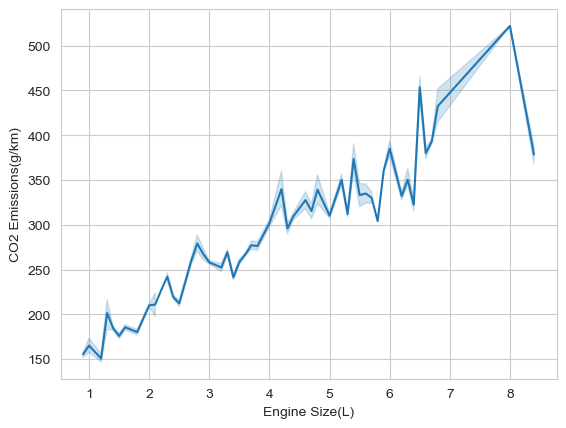

In [16]:
sns.lineplot(data = df, x = "Engine Size(L)",  y = "CO2 Emissions(g/km)")

#### Data cleaning

In [17]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   float64
dtypes: float64(

In [19]:
# delete unnecessary columns
df.drop("Model", axis = 1, inplace = True)

# chech nan values
for column in df.columns:
    print(column)
    print(f"{df[column].isnull().value_counts()}\n") 

Make
Make
False    7385
Name: count, dtype: int64

Vehicle Class
Vehicle Class
False    7385
Name: count, dtype: int64

Engine Size(L)
Engine Size(L)
False    7385
Name: count, dtype: int64

Cylinders
Cylinders
False    7385
Name: count, dtype: int64

Transmission
Transmission
False    7385
Name: count, dtype: int64

Fuel Type
Fuel Type
False    7385
Name: count, dtype: int64

Fuel Consumption City (L/100 km)
Fuel Consumption City (L/100 km)
False    7385
Name: count, dtype: int64

Fuel Consumption Hwy (L/100 km)
Fuel Consumption Hwy (L/100 km)
False    7385
Name: count, dtype: int64

Fuel Consumption Comb (L/100 km)
Fuel Consumption Comb (L/100 km)
False    7385
Name: count, dtype: int64

Fuel Consumption Comb (mpg)
Fuel Consumption Comb (mpg)
False    7385
Name: count, dtype: int64

CO2 Emissions(g/km)
CO2 Emissions(g/km)
False    7385
Name: count, dtype: int64



=> There is no NaN values in this csv! 

#### Data formatting

In [20]:
df["CO2 Emissions(g/km)"] = df["CO2 Emissions(g/km)"].astype(int)
df.rename({"Make":"Car"}, axis = 1, inplace = True)

In [21]:
df.dtypes

Car                                  object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int32
dtype: object

#### Data visualization

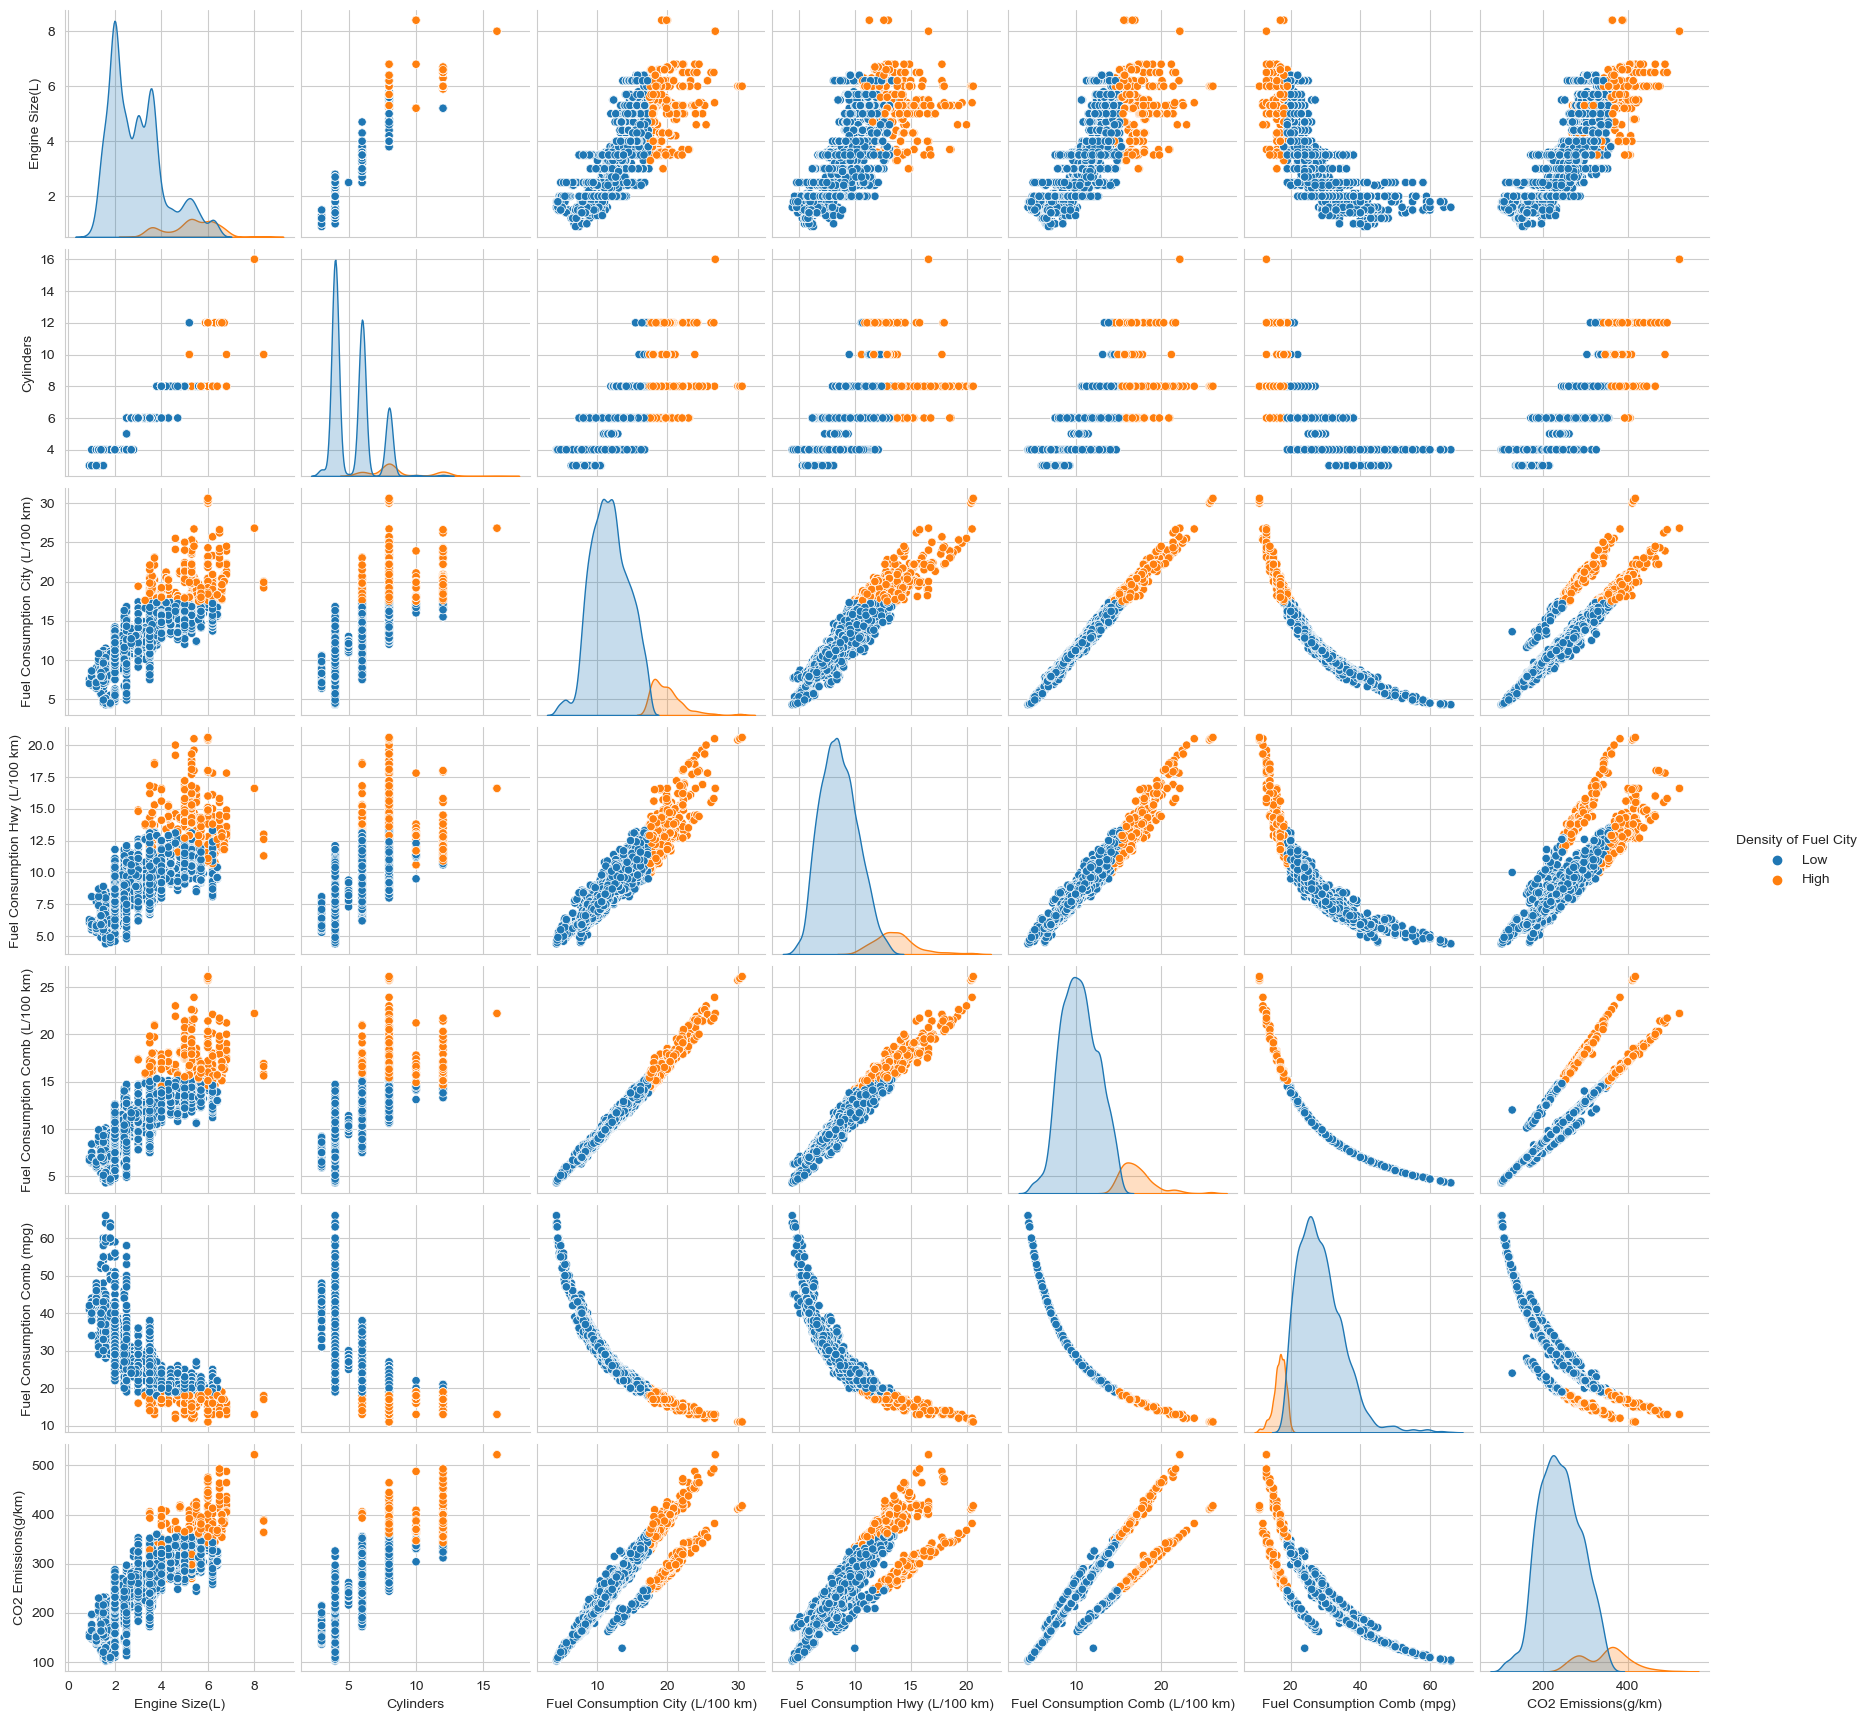

In [24]:
sns.pairplot(data = df, hue = "Density of Fuel City")

#### binning

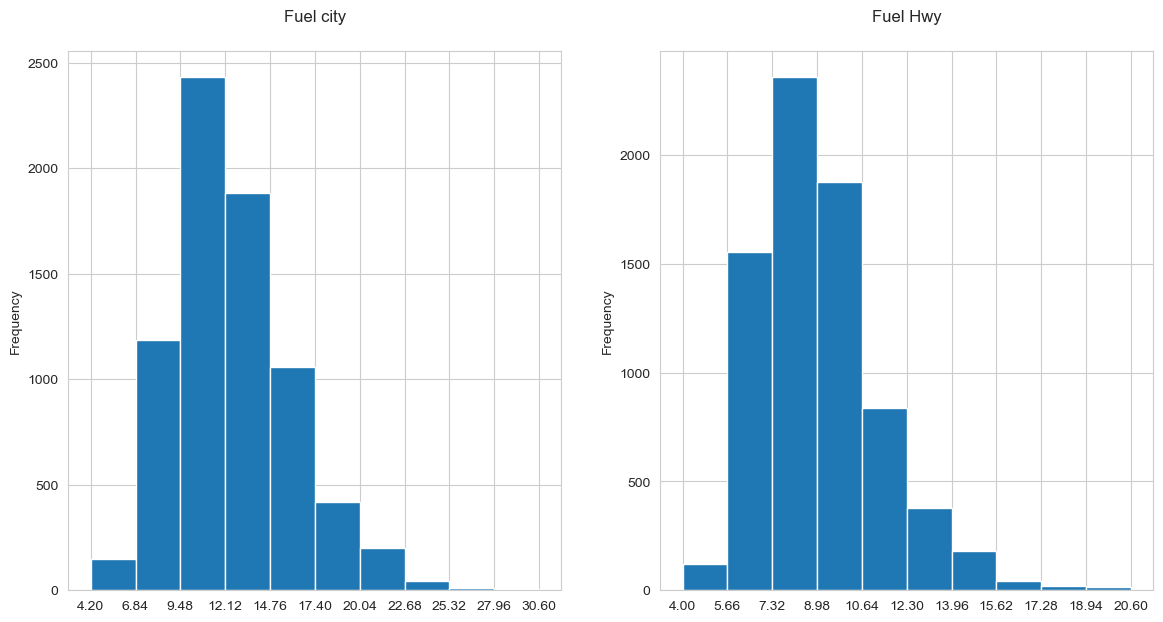

In [8]:
count, bins_edge1 = np.histogram(df["Fuel Consumption City (L/100 km)"])
count, bins_edge2 = np.histogram(df["Fuel Consumption Hwy (L/100 km)"])

fig = plt.figure(figsize = (14,7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

df["Fuel Consumption City (L/100 km)"].plot(kind = "hist", xticks = bins_edge1, ax = ax1)
ax1.set_title("Fuel city", y = 1.04)

df["Fuel Consumption Hwy (L/100 km)"].plot(kind = "hist", xticks = bins_edge2 ,ax = ax2)
ax2.set_title("Fuel Hwy", y = 1.04)


plt.show()

In [23]:
bins1 = np.linspace(min(df['Fuel Consumption City (L/100 km)']), max(df["Fuel Consumption City (L/100 km)"]), 3)
bins2 = np.linspace(min(df["Fuel Consumption Hwy (L/100 km)"]), max(df["Fuel Consumption Hwy (L/100 km)"]), 3)

df["Density of Fuel City"] = pd.cut(df["Fuel Consumption City (L/100 km)"], bins1, labels = ["Low", "High"])
df["Density of Fuel HWy"] = pd.cut(df["Fuel Consumption Hwy (L/100 km)"], bins2, labels = ["Low", "High"])
df

,Car,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Density of Fuel City,Density of Fuel HWy
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,Low,Low
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,Low,Low
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,Low,Low
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,Low,Low
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,Low,Low
7381,VOLVO,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,Low,Low
7382,VOLVO,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,Low,Low
7383,VOLVO,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,Low,Low


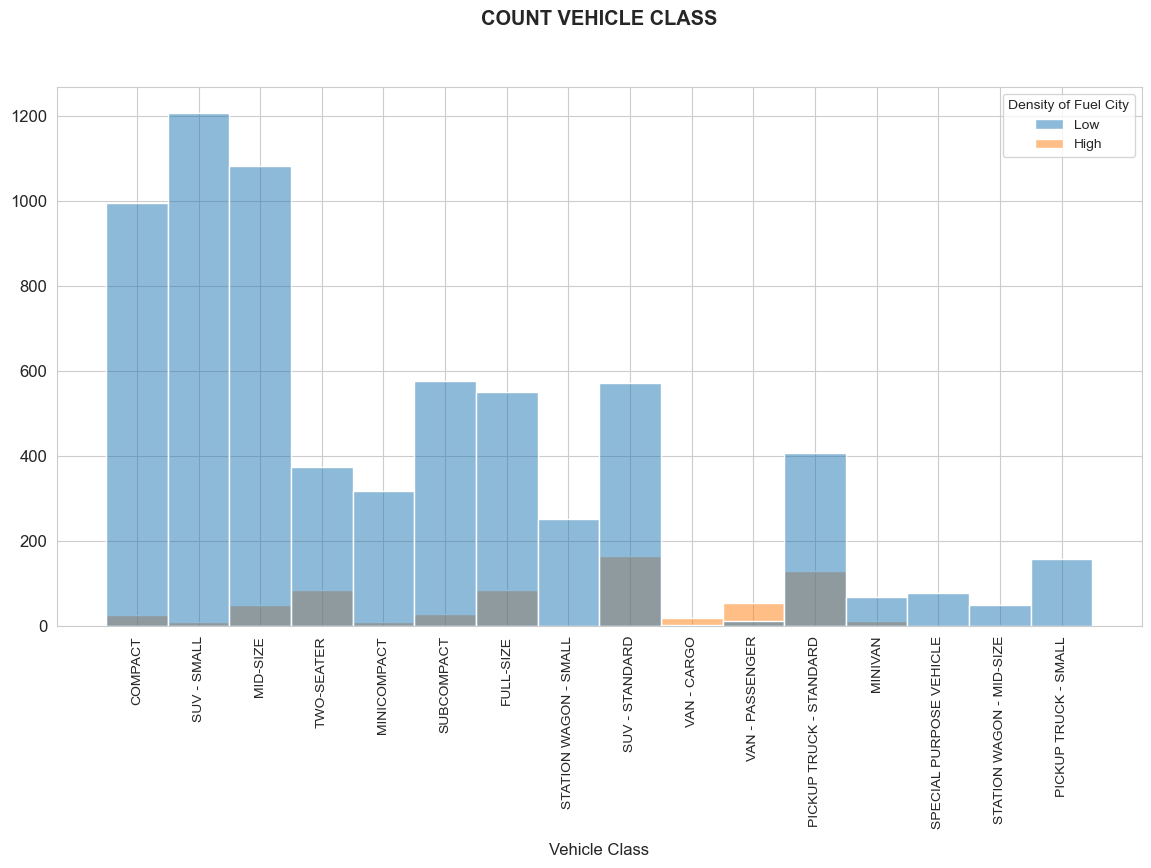

In [25]:
plt.figure(figsize = (14,7))
sns.histplot(data = df, x = "Vehicle Class", hue = "Density of Fuel City")

plt.title("COUNT VEHICLE CLASS", fontweight = "bold", fontsize = "x-large", y = 1.1)
plt.xlabel("Vehicle Class", fontsize = "large", labelpad = 10)
plt.ylabel(None)
plt.tick_params(axis = "x", labelsize = "medium")
plt.tick_params(axis = "y", labelsize = "large")

plt.xticks(rotation = 90)
plt.show()

=> Count the density of the Vehicle Class column in this csv file

#### Relationship of Car and Co2 emissions

In [26]:
df_vehicle_co2 = df.groupby(["Car"], as_index = False)["CO2 Emissions(g/km)"].mean()
df_vehicle_co2

,Car,CO2 Emissions(g/km)
0,ACURA,223.652778
1,ALFA ROMEO,224.900000
2,ASTON MARTIN,339.617021
3,AUDI,250.846154
4,BENTLEY,362.934783
5,BMW,254.007590
6,BUGATTI,522.000000
7,BUICK,233.058252
8,CADILLAC,265.854430
9,CHEVROLET,264.346939


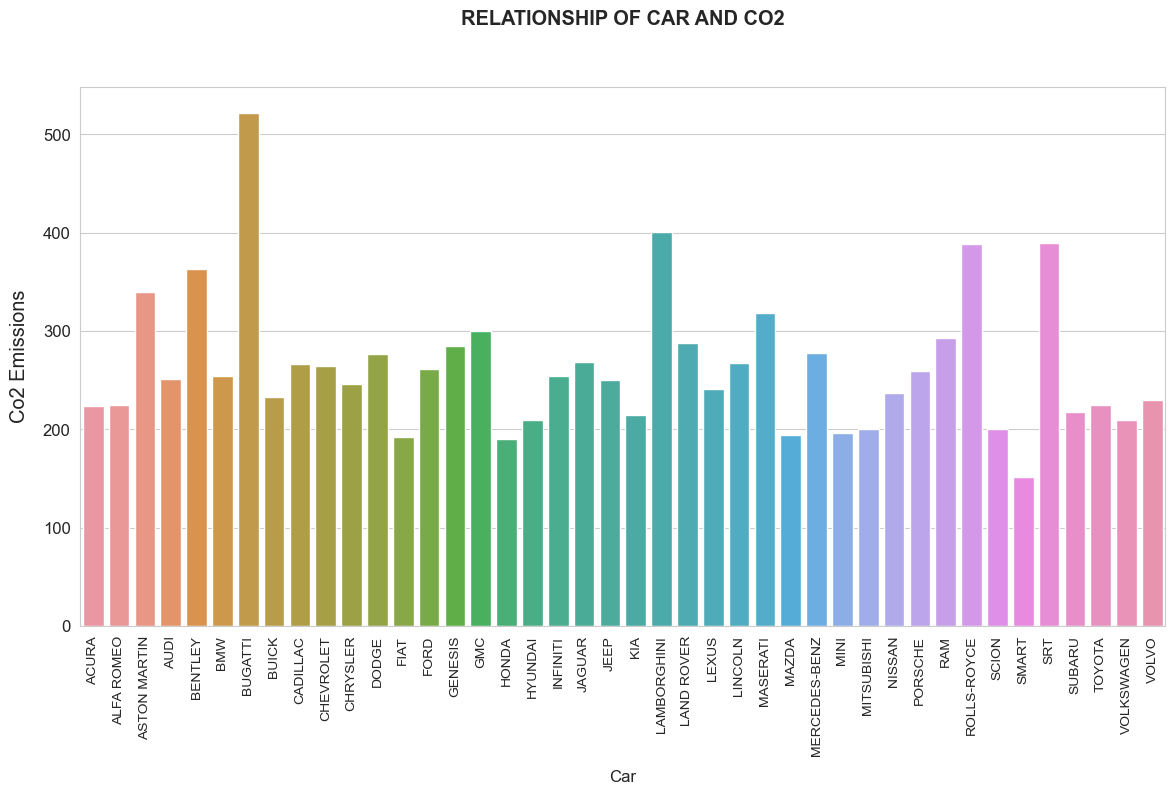

In [27]:
plt.figure(figsize = (14, 7))
sns.barplot(data = df_vehicle_co2, x = "Car", y  = "CO2 Emissions(g/km)")

plt.title("RELATIONSHIP OF CAR AND CO2", fontweight = "bold", fontsize = "x-large", y = 1.1)
plt.xlabel("Car", fontsize = "large", labelpad = 10)
plt.ylabel("Co2 Emissions", fontsize = "x-large", labelpad = 10)

plt.tick_params(axis = "x", labelsize = "medium")
plt.tick_params(axis = "y", labelsize = "large")

plt.xticks(rotation = 90)
plt.show()

=> Bugatti has a huge amount of co2 emissions

=> SRT and Rolls-royce have the same co2 emission

#### Correlaton of whole fuel consumption

In [28]:
df.columns

Index(['Car', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
       'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)',
       'Density of Fuel City', 'Density of Fuel HWy'],
      dtype='object')

<Axes: >

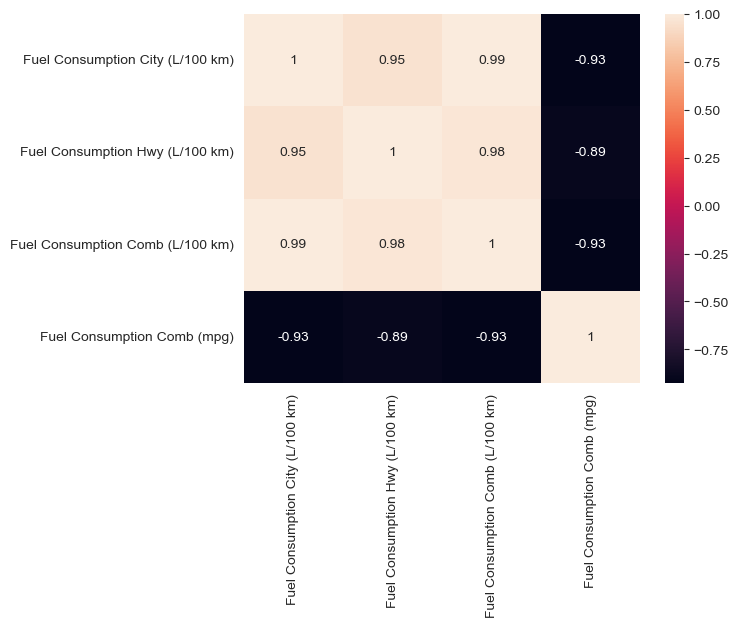

In [29]:
df_fuel = df[['Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)']].corr()
sns.heatmap(data = df_fuel, annot = True)

#### Top 7 Vehicles Class that emit the most CO2

In [34]:
df1 = df.groupby(["Vehicle Class"])[["CO2 Emissions(g/km)"]].mean().sort_values("CO2 Emissions(g/km)", ascending = False)
df1

,CO2 Emissions(g/km)
Vehicle Class,
VAN - PASSENGER,397.212121
VAN - CARGO,361.500000
SUV - STANDARD,304.836735
PICKUP TRUCK - STANDARD,301.513011
PICKUP TRUCK - SMALL,278.968553
TWO-SEATER,277.454348
FULL-SIZE,263.316119
MINIVAN,262.312500
SUBCOMPACT,246.448845


ValueError: 'explode' must be of length 'x'

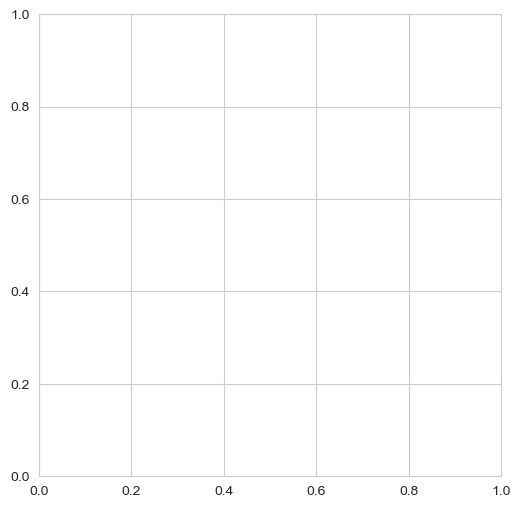

In [35]:
# df1 = df1.head(7)

plt.figure(figsize = (13, 6))
plt.pie( x = df1["CO2 Emissions(g/km)"], data = df1,                                 
#                    colors = ["lightcoral", "green", "yellowgreen", "red", "blue", "orchid", "cornflowerblue"],
        colors = sns.color_palette("muted"),
                   shadow = True, explode = [0, 0, 0, 0.1, 0.2, 0, 0], 
                   autopct = "%.1f%%", textprops = {"fontsize":10.5} ,
                   labels = df1.index, startangle = 90, 
       
                   pctdistance = 0.7, counterclock = False, frame = False,  labeldistance= 1.2, rotatelabels = False,
                   wedgeprops = {'linewidth': 3, 'edgecolor': 'white'})


# plt.gcf().gca().add_artist(plt.Circle((0, 0), 0.40, fc="white"))


plt.title("TOP 7 VEHICLE CLASS THAT EMIT THE MOST CO2", fontsize = 16, fontweight = "bold", x = 0.5, y = 1.12)
#              horizontalalignment='center',  verticalalignment='center')


plt.legend(df1.index, ncol = 2, loc = "best", bbox_to_anchor=(0.72, -0.04), fontsize = 'medium')
plt.ylabel("CO2 Emissions(g/km)", fontsize = "large")

plt.axis("equal")
# plt.tight_layout()
plt.show()

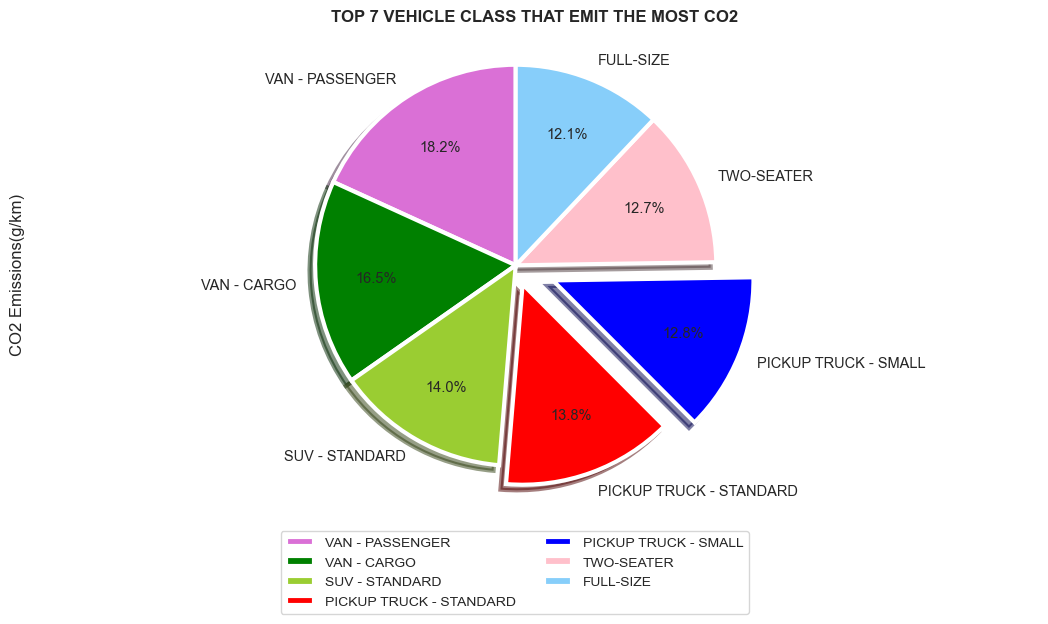

In [36]:
plt.figure(figsize = (13, 6))
df1["CO2 Emissions(g/km)"].head(7).plot(kind = "pie",                                       
                                       colors = ["orchid", "green", "yellowgreen", "red", "blue", "pink", "lightskyblue"],
                                       shadow = True, explode = [0, 0, 0, 0.1, 0.2, 0, 0], 
                                       autopct = "%.1f%%", textprops = {"fontsize":10.5} ,
                                       labels = df1.index, startangle = 90,
                                       pctdistance = 0.7, counterclock = True, frame = False,  labeldistance = 1.10,
                                        rotatelabels = False,
                                       wedgeprops = {'linewidth': 3, 'edgecolor': 'white'})

# colors = "cornflowerblue", "orchid"
# plt.gcf().gca().add_artist(plt.Circle((0, 0), 0.40, fc="white"))

plt.title("TOP 7 VEHICLE CLASS THAT EMIT THE MOST CO2", fontsize = "large", fontweight = "bold", y = 1.03)
plt.legend(df1.index, ncol = 2, loc = "best", bbox_to_anchor=(0.72, -0.04), fontsize = 'medium')
plt.ylabel("CO2 Emissions(g/km)", fontsize = "large")

plt.axis("equal")
# plt.tight_layout()
plt.show()

# Machine learning (linear regression with matplotlib)

In [356]:
df.columns

Index(['Car', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
       'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)',
       'Density of Fuel City', 'Density of Fuel HWy'],
      dtype='object')

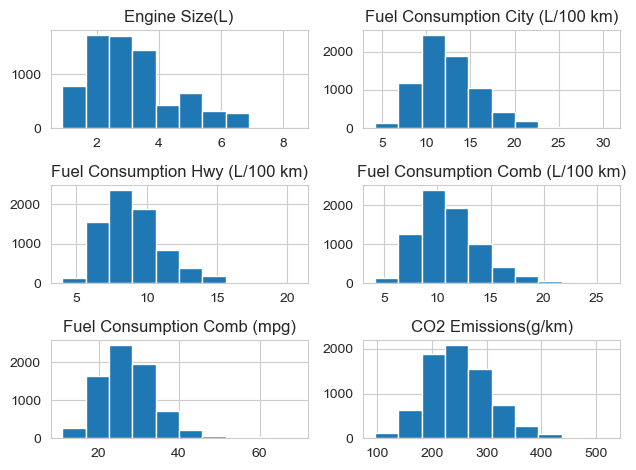

In [55]:
cdf = df[['Engine Size(L)',"Fuel Consumption City (L/100 km)",
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]
cdf.hist()

plt.tight_layout()
plt.show()

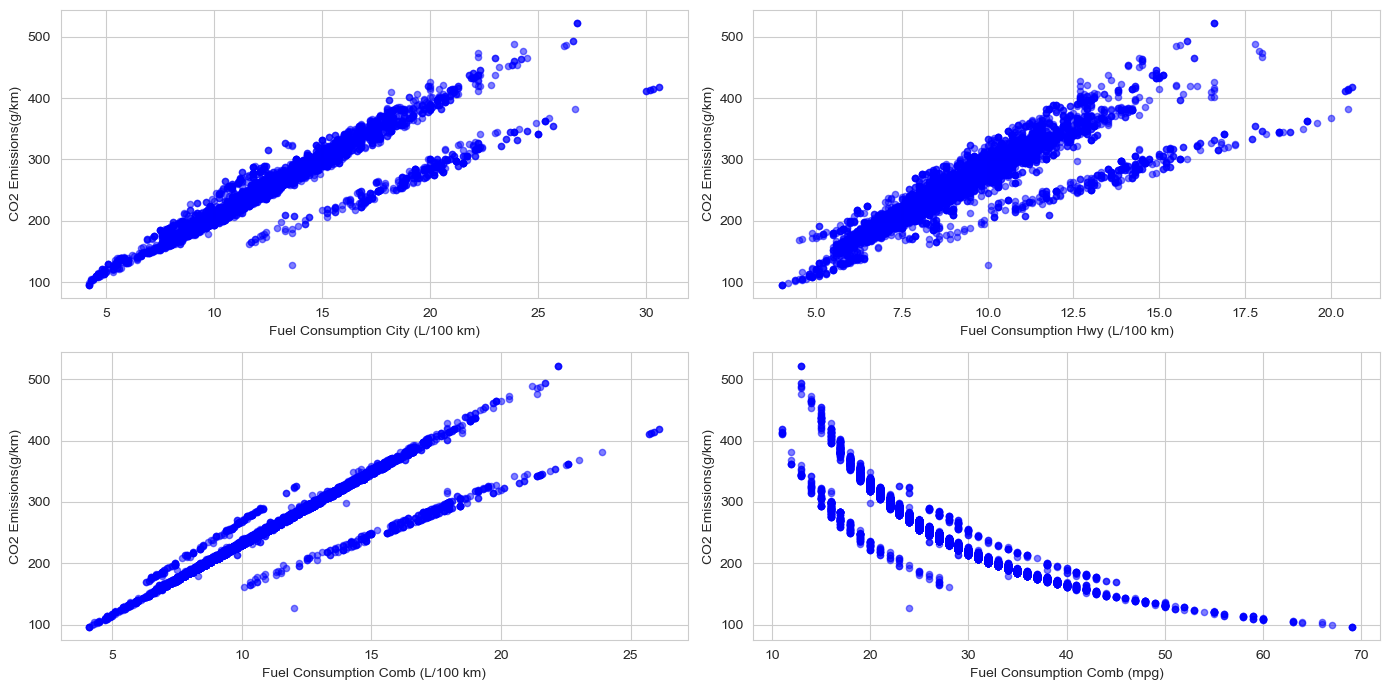

In [380]:
fig = plt.figure(figsize = (14, 7))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

cdf.plot(kind = "scatter", x = "Fuel Consumption City (L/100 km)", y = "CO2 Emissions(g/km)",
        color = "blue", alpha = 0.5, ax = ax1)

cdf.plot(kind = "scatter", x = 'Fuel Consumption Hwy (L/100 km)', y = "CO2 Emissions(g/km)",
        color = "blue", alpha = 0.5, ax = ax2)

cdf.plot(kind = "scatter", x = 'Fuel Consumption Comb (L/100 km)', y = "CO2 Emissions(g/km)",
        color = "blue", alpha = 0.5, ax = ax3)

cdf.plot(kind = "scatter", x = 'Fuel Consumption Comb (mpg)', y = "CO2 Emissions(g/km)",
        color = "blue", alpha = 0.5, ax = ax4)

plt.tight_layout()
plt.show()

=> 3 imagies got linear regression is increase

=> last one is going down

#### simple regression

In [397]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[msk]

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X_train = train[["Engine Size(L)"]] 
y_train = train[["CO2 Emissions(g/km)"]]
lm.fit(X_train, y_train)

print("Coefficients: ", lm.coef_)
print("Intercept: ", lm.intercept_)

Coefficients:  [[37.21073415]]
Intercept:  [133.06164087]


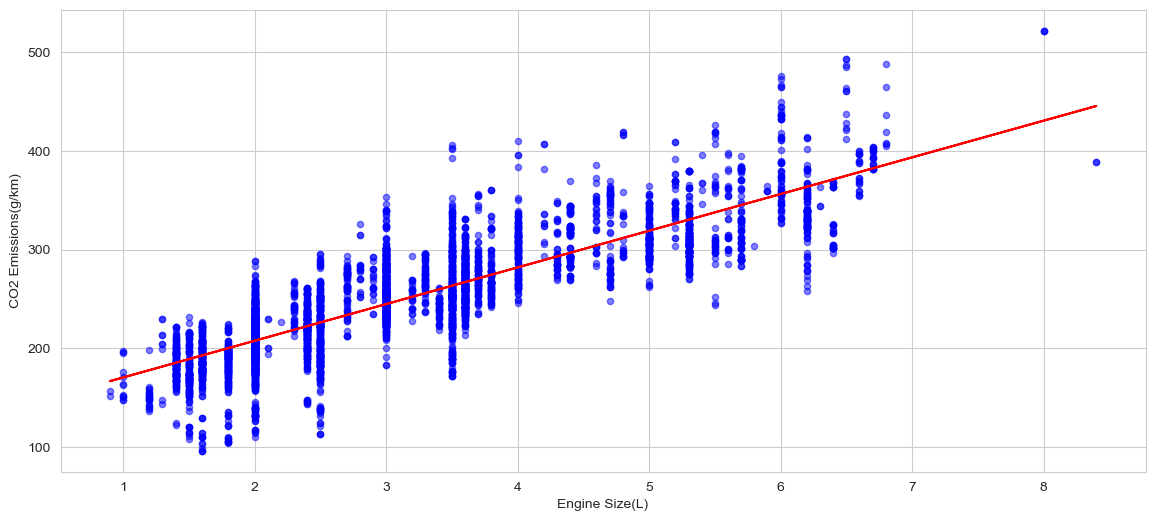

In [408]:
train.plot(kind = "scatter", x = "Engine Size(L)", y = "CO2 Emissions(g/km)", 
           color = "blue", alpha = 0.5, figsize = (14, 6))
plt.plot(X_train, lm.coef_[0][0] * X_train + lm.intercept_[0], "r")

plt.show()

# Machine learning (linear regression with seaborn)

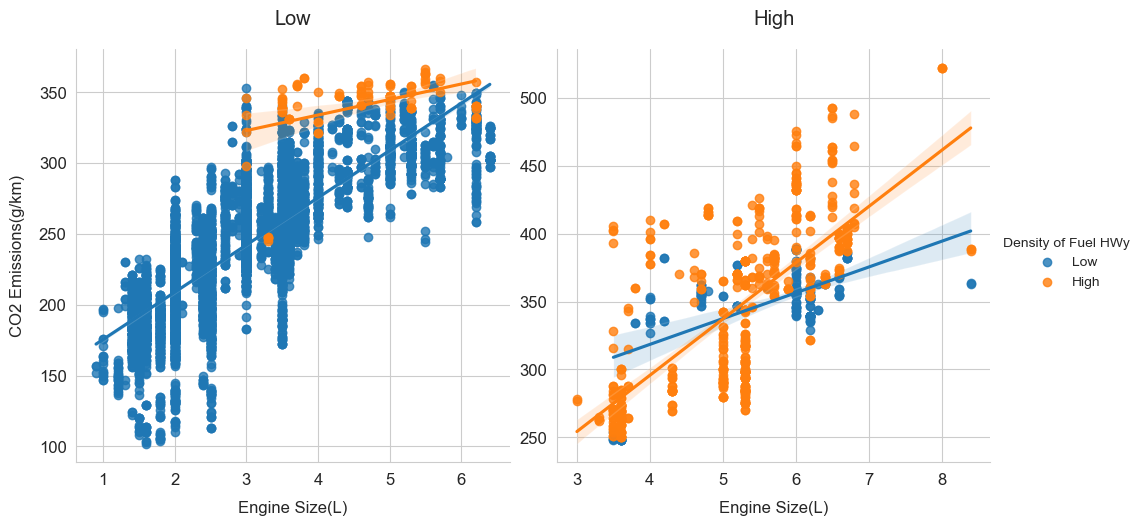

In [443]:
ax = sns.lmplot(data = df, x = "Engine Size(L)", y = "CO2 Emissions(g/km)", 
          col = "Density of Fuel City", hue = "Density of Fuel HWy", height = 5,
          facet_kws = dict(sharex = False, sharey = False))

ax.set_titles(col_template = "{col_name}", size = "x-large", y = 1.04)
ax.set_xlabels(size = "large", labelpad = 10)
ax.set_ylabels(size = "large", labelpad = 10)
ax.tick_params(axis = "x", labelsize = "large")
ax.tick_params(axis = "y", labelsize = "large")


# plt.tight_layout()
plt.show()

# Machine learning (linear regression with sklearn)

In [ ]:
cdf.style.format().hide_index().background_gradient(subset = ["CO2 Emissions(g/km)"], cmap = "Blues")

In [469]:
x = cdf[['Engine Size(L)', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)']]
y = cdf["CO2 Emissions(g/km)"]

# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.3)


# fit linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print("Coefficient: ", lm.coef_)
print("Intercept: %.2f\n" % lm.intercept_)


# predict
prediction = lm.predict(X_test)


# model evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Varicance score: %.2f" % r2_score(y_test, prediction))
print("MAE: %.2f" % mean_absolute_error(y_test, prediction))
print("MSE: %.2f" % mean_squared_error(y_test, prediction))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, prediction)))

Coefficient:  [13.40622611  0.83231214  2.12278796  3.24784403 -3.28825362]
Intercept: 233.30

Varicance score: 0.89
MAE: 11.88
MSE: 378.86
RMSE: 19.46


In [508]:
print(y_test.max()) 
print(prediction.max())

522
430.00941737065216


Text(0, 0.5, 'prediction')

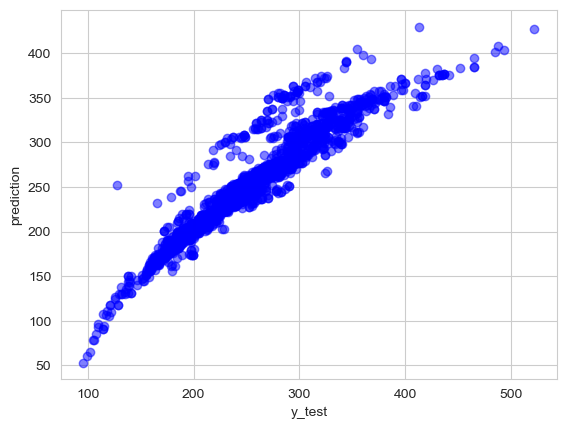

In [502]:
plt.scatter(y_test, prediction, color = "blue", alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("prediction")

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Count'>

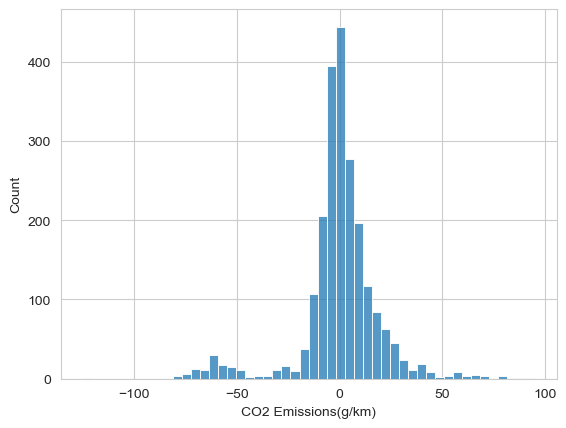

In [493]:
sns.histplot(y_test - prediction, bins = 50)